In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
%matplotlib inline

In [2]:
df = pd.read_excel('combined_data.xlsx')

# Data Cleaning and Preprocessing

Data cleaning and preprocessing is an important step in building reliable machine learning models. Poor data quality can lead to inaccurate predictions, misleading insights, and overfitting. In this notebook, the synthetic dataset is prepared for modeling by checking for missing values and outliers and transforming the target variable. These steps ensure that the dataset is consistent, interpretable, and ready for use across different machine learning algorithms.

In [3]:
df. head()

,age,gender,household_size,occupation_status,income,house_type,house_age,house_size,location,energy_bill,...,knowledge_energy,energy_awareness,attitude_energy_reduction,investment_willingness,belief_climate_change,financial_awareness,perceived_efficiency,environment_concern,previous_renovations,booked_energy_consultation
0,26,Male,1,Unemployed,20108,Multi-family House,2020,120,Rural,103,...,4,4,2,1,Yes,No,1,2,10,No
1,28,Female,3,Employed,53000,Detached,2020,400,Urban,170,...,2,4,5,3,Yes,No,2,5,1,Considered but not used
2,52,Male,2,Employed,86352,Detached,1953,253,Urban,165,...,2,2,3,4,Yes,No,2,1,7,Yes
3,17,Other,1,Employed,27633,Detached,2018,108,Urban,102,...,4,4,2,1,Yes,No,4,2,7,No
4,20,Male,1,Employed,25011,Detached,2020,110,Urban,106,...,4,4,2,1,Yes,No,1,2,9,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   age                         7500 non-null   int64 
 1   gender                      7500 non-null   object
 2   household_size              7500 non-null   int64 
 3   occupation_status           7500 non-null   object
 4   income                      7500 non-null   int64 
 5   house_type                  7500 non-null   object
 6   house_age                   7500 non-null   int64 
 7   house_size                  7500 non-null   int64 
 8   location                    7500 non-null   object
 9   energy_bill                 7500 non-null   int64 
 10  energy_source               7500 non-null   object
 11  knowledge_energy            7500 non-null   int64 
 12  energy_awareness            7500 non-null   int64 
 13  attitude_energy_reduction   7500 non-null   int6

In [5]:
df.describe()

,age,household_size,income,house_age,house_size,energy_bill,knowledge_energy,energy_awareness,attitude_energy_reduction,investment_willingness,perceived_efficiency,environment_concern,previous_renovations
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.00000,7500.000000,7500.000000,7500.000000,7500.000000
mean,36.889067,1.659600,43145.814933,1994.180267,171.549867,127.039867,3.270267,3.275467,2.45000,2.200267,2.836933,2.489200,4.421333
std,16.351396,0.905154,26300.524490,26.981456,92.959732,26.901690,1.034230,1.030207,1.04953,1.451496,1.312671,1.065537,3.083680
min,12.000000,1.000000,0.000000,1900.000000,90.000000,90.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000
25%,24.000000,1.000000,23350.000000,1967.000000,107.000000,105.000000,2.000000,2.000000,2.00000,1.000000,2.000000,2.000000,2.000000
50%,29.000000,1.000000,29363.000000,2010.000000,113.000000,113.000000,4.000000,4.000000,2.00000,1.000000,2.000000,2.000000,4.000000
75%,53.000000,2.000000,73573.250000,2017.000000,266.000000,150.000000,4.000000,4.000000,3.00000,4.000000,4.000000,3.000000,7.000000
max,99.000000,7.000000,111900.000000,2020.000000,800.000000,241.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,10.000000


### Checking for missing data

In [6]:
df.isna().sum()

age                           0
gender                        0
household_size                0
occupation_status             0
income                        0
house_type                    0
house_age                     0
house_size                    0
location                      0
energy_bill                   0
energy_source                 0
knowledge_energy              0
energy_awareness              0
attitude_energy_reduction     0
investment_willingness        0
belief_climate_change         0
financial_awareness           0
perceived_efficiency          0
environment_concern           0
previous_renovations          0
booked_energy_consultation    0
dtype: int64

In [7]:
numerical_df_bp = df.select_dtypes(include=['number']).copy()

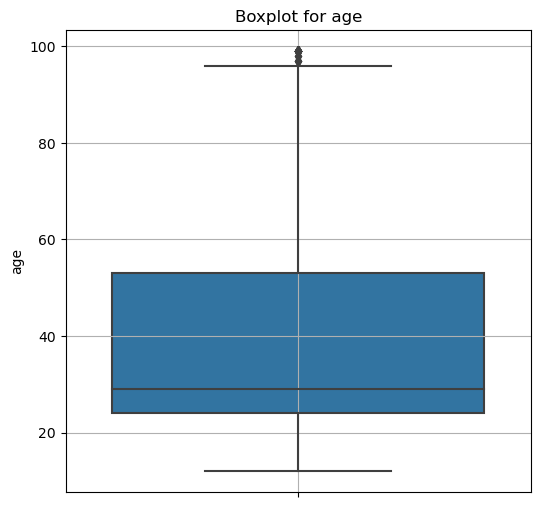

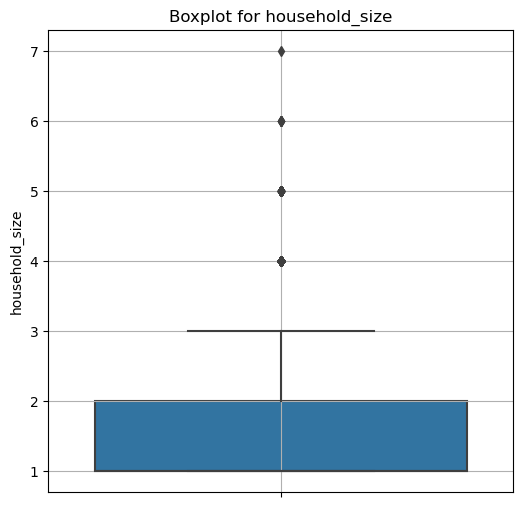

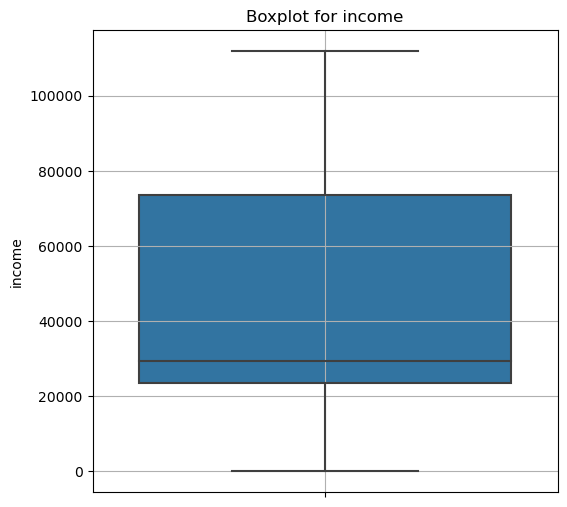

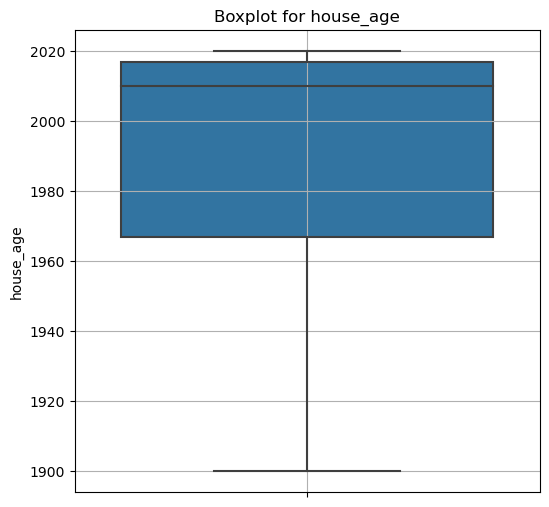

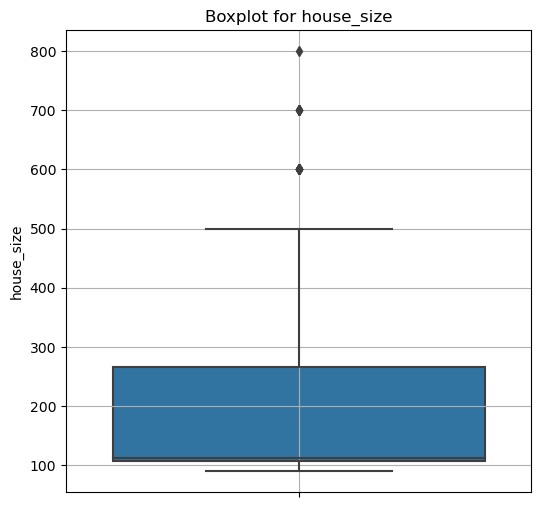

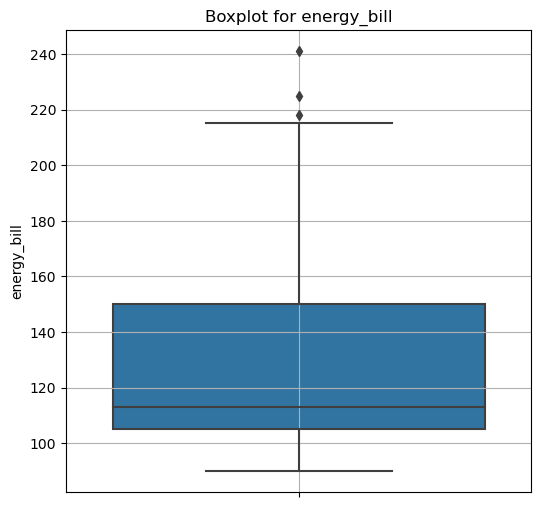

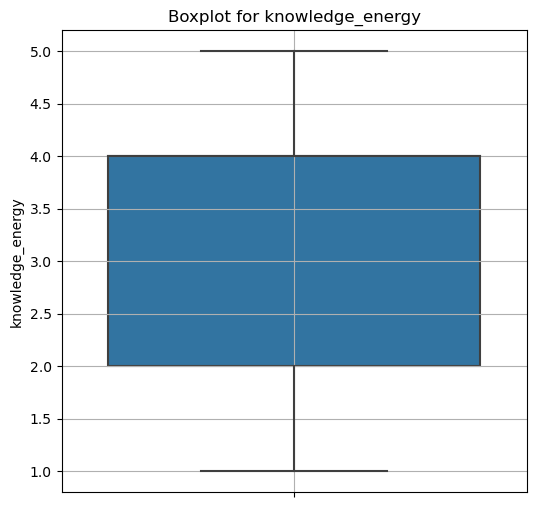

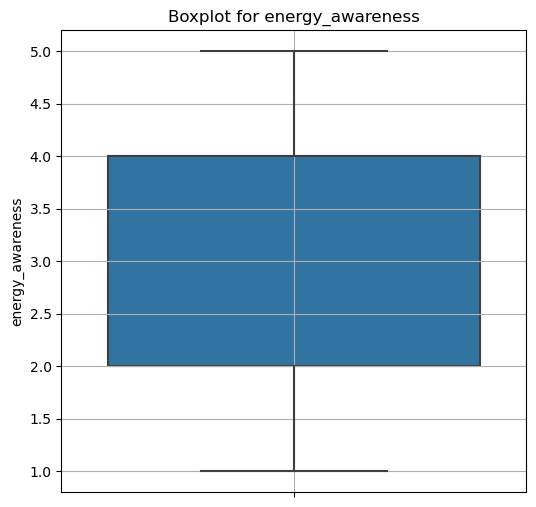

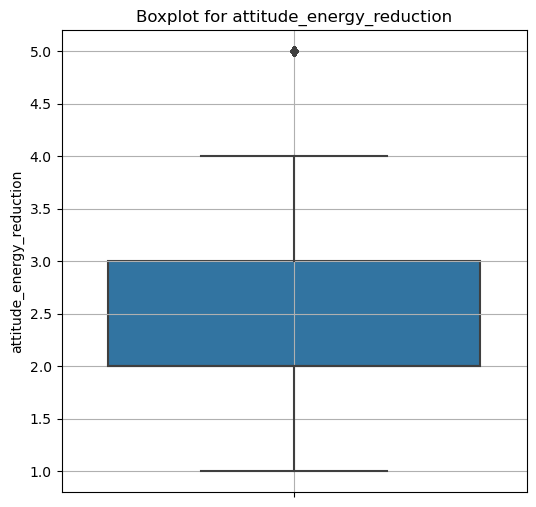

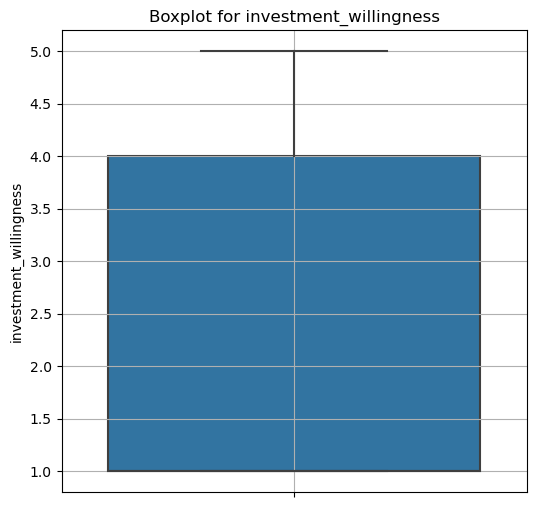

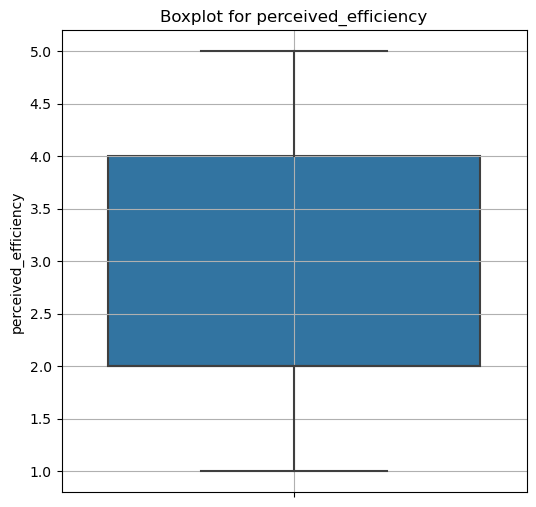

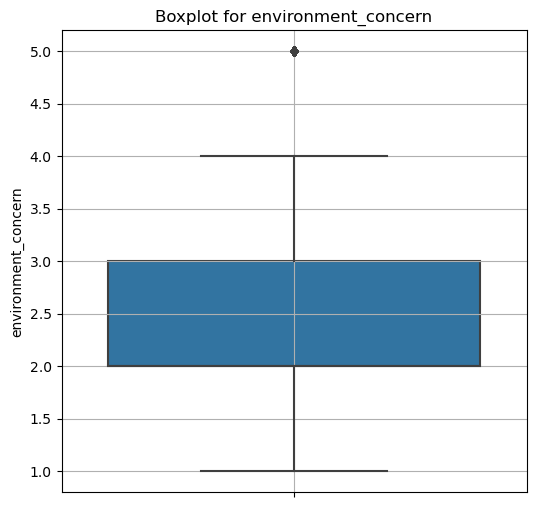

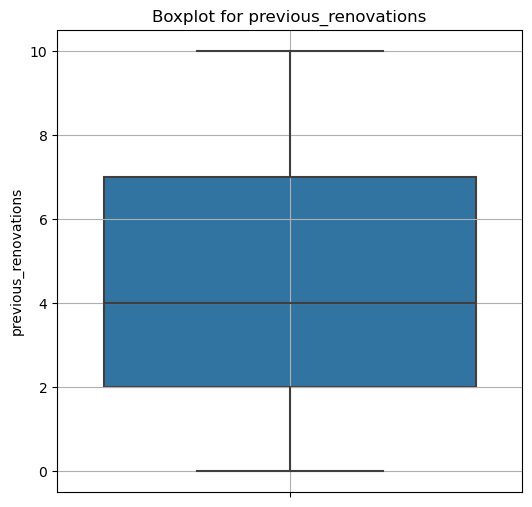

In [8]:
for column in numerical_df_bp.columns:
    plt.figure(figsize=(6, 6))  # Set the figure size for better readability
    sns.boxplot(y=numerical_df_bp[column])
    plt.title(f'Boxplot for {column}')  # Title for each plot
    plt.grid(True)  # Add grid for easier visualization
    plt.show()  # Display the plot

In [9]:
outlier_counts = {}

for column in numerical_df_bp.columns:
    Q1 = numerical_df_bp[column].quantile(0.25)
    Q3 = numerical_df_bp[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = numerical_df_bp[(numerical_df_bp[column] < lower_bound) | (numerical_df_bp[column] > upper_bound)]
    outlier_count = outliers.shape[0]
    outlier_counts[column] = outlier_count

    #if not outliers.empty:
     #   print(f"Outliers in {column}:")
      #  print(outliers, "\n")
    #else:
     #   print(f"No outliers found in {column}.")

# Print the number of outliers for each column
print("Outlier counts for each column:")
for column, count in outlier_counts.items():
    print(f"{column}: {count}")

Outlier counts for each column:
age: 21
household_size: 432
income: 0
house_age: 0
house_size: 22
energy_bill: 3
knowledge_energy: 0
energy_awareness: 0
attitude_energy_reduction: 617
investment_willingness: 0
perceived_efficiency: 0
environment_concern: 657
previous_renovations: 0


### Distribution of Numeric Features

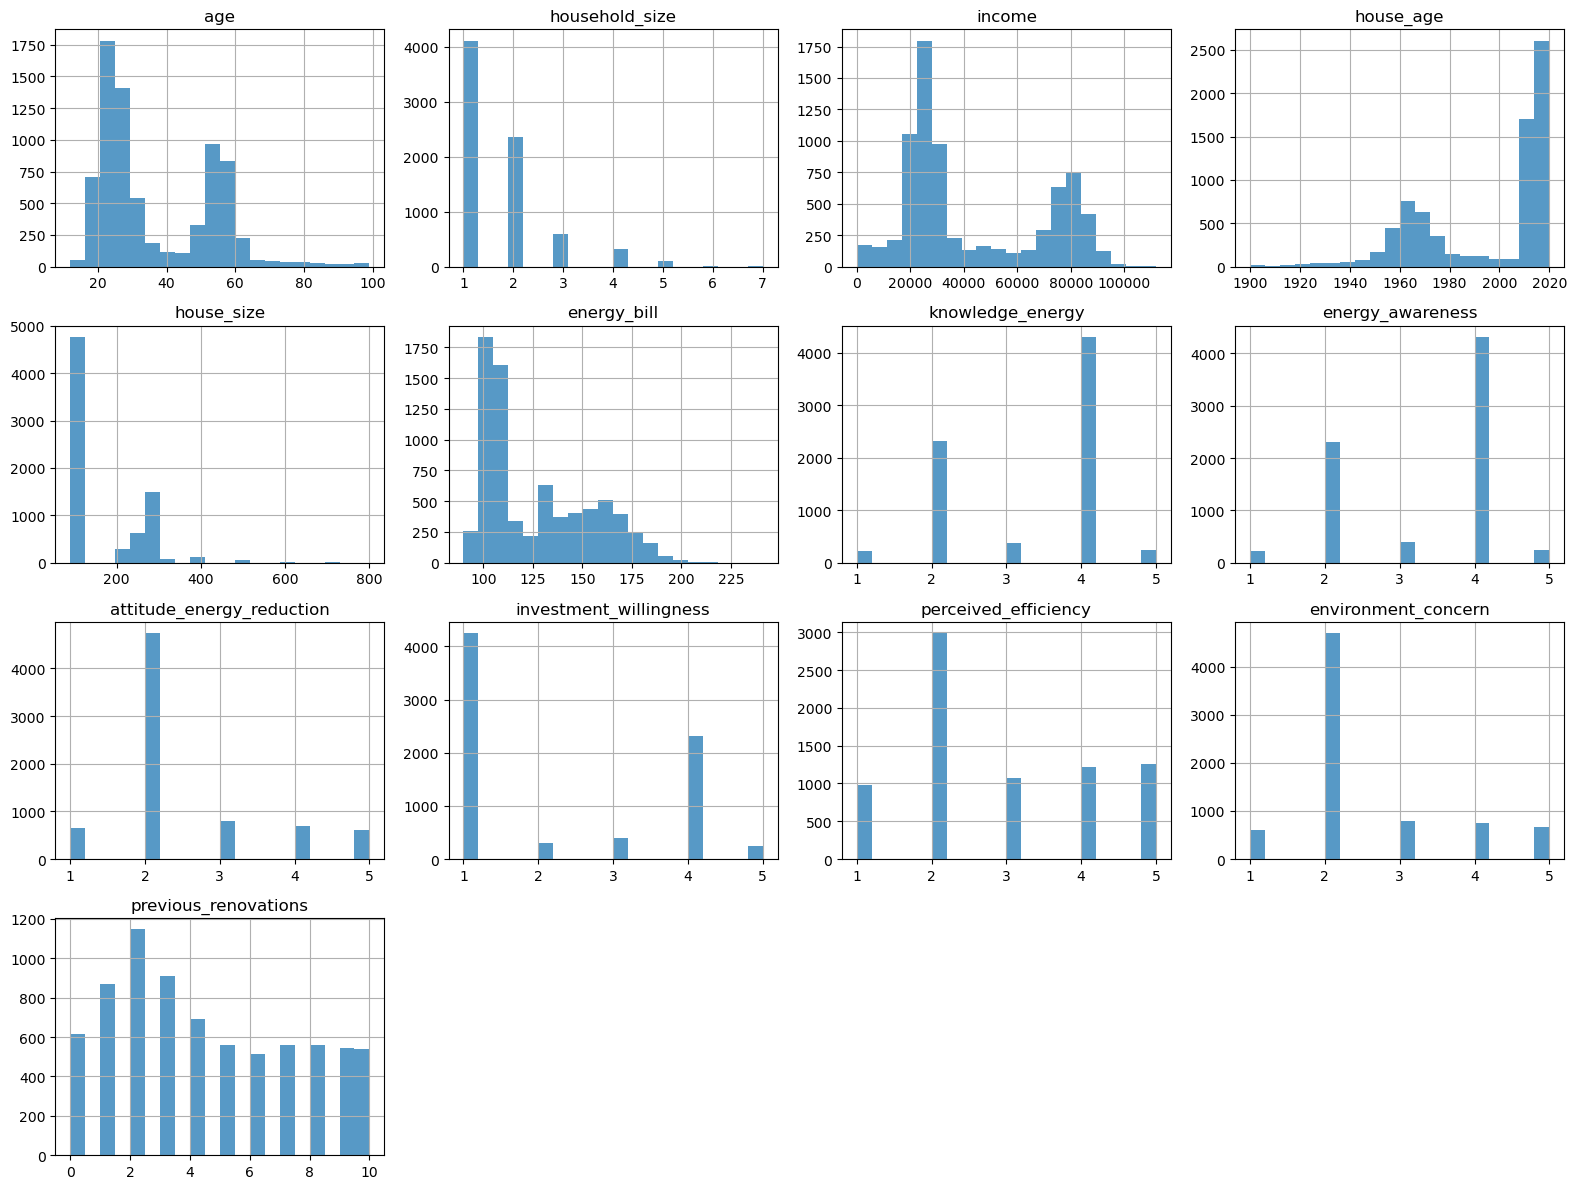

In [17]:
num_cols = df.select_dtypes(include=['number']).columns
n_cols = 4 
n_rows = (len(num_cols) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3)) 
axes = axes.flatten() 

for i, col in enumerate(num_cols):
    df[col].hist(ax=axes[i], bins=20, alpha=0.75)
    axes[i].set_title(col)

# Hide any unused axes
for ax in axes[len(num_cols):]:
    ax.axis('off')

plt.tight_layout()
#plt.savefig('histograms.png') # for saving as picture
plt.show()

## Creating a new dataset with the target variable in binary format

To prepare the dataset for classification, the target variable was converted into a binary format. Entries labeled as “considered but not used” were grouped with “no” and mapped to False. The reason for this simplification is that the model is intended to identify individuals who are most likely to actually book an energy consultation—not those who merely express interest but ultimately take no action.

In [13]:
df_new.head()

,age,gender,household_size,occupation_status,income,house_type,house_age,house_size,location,energy_bill,...,knowledge_energy,energy_awareness,attitude_energy_reduction,investment_willingness,belief_climate_change,financial_awareness,perceived_efficiency,environment_concern,previous_renovations,booked_energy_consultation
0,26,Male,1,Unemployed,20108,Multi-family House,2020,120,Rural,103,...,4,4,2,1,Yes,No,1,2,10,False
1,28,Female,3,Employed,53000,Detached,2020,400,Urban,170,...,2,4,5,3,Yes,No,2,5,1,False
2,52,Male,2,Employed,86352,Detached,1953,253,Urban,165,...,2,2,3,4,Yes,No,2,1,7,True
3,17,Other,1,Employed,27633,Detached,2018,108,Urban,102,...,4,4,2,1,Yes,No,4,2,7,False
4,20,Male,1,Employed,25011,Detached,2020,110,Urban,106,...,4,4,2,1,Yes,No,1,2,9,False


In [10]:
df_new = df.copy()

In [12]:
df_new['booked_energy_consultation'] = df_new['booked_energy_consultation'].replace({
    'Yes': True,
    'No': False,
    'Considered but not used': False
})

In [14]:
# exporting the converted dataset to excel
df_new.to_excel('combined_data_binary.xlsx')

### One-Hot Encoding

In [15]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# One-hot encode the categorical variables
encoder = OneHotEncoder(sparse_output=False, drop='first')
categorical_encoded = encoder.fit_transform(df[categorical_cols])
categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(categorical_cols))

data_preprocessed = pd.concat([df[numerical_cols].reset_index(drop=True), categorical_encoded_df.reset_index(drop=True)], axis=1)

### Building a correlation matrix with all numerical data

A correlation matrix was used after one-hot encoding, as the features were not too numerous to affect interpretability.

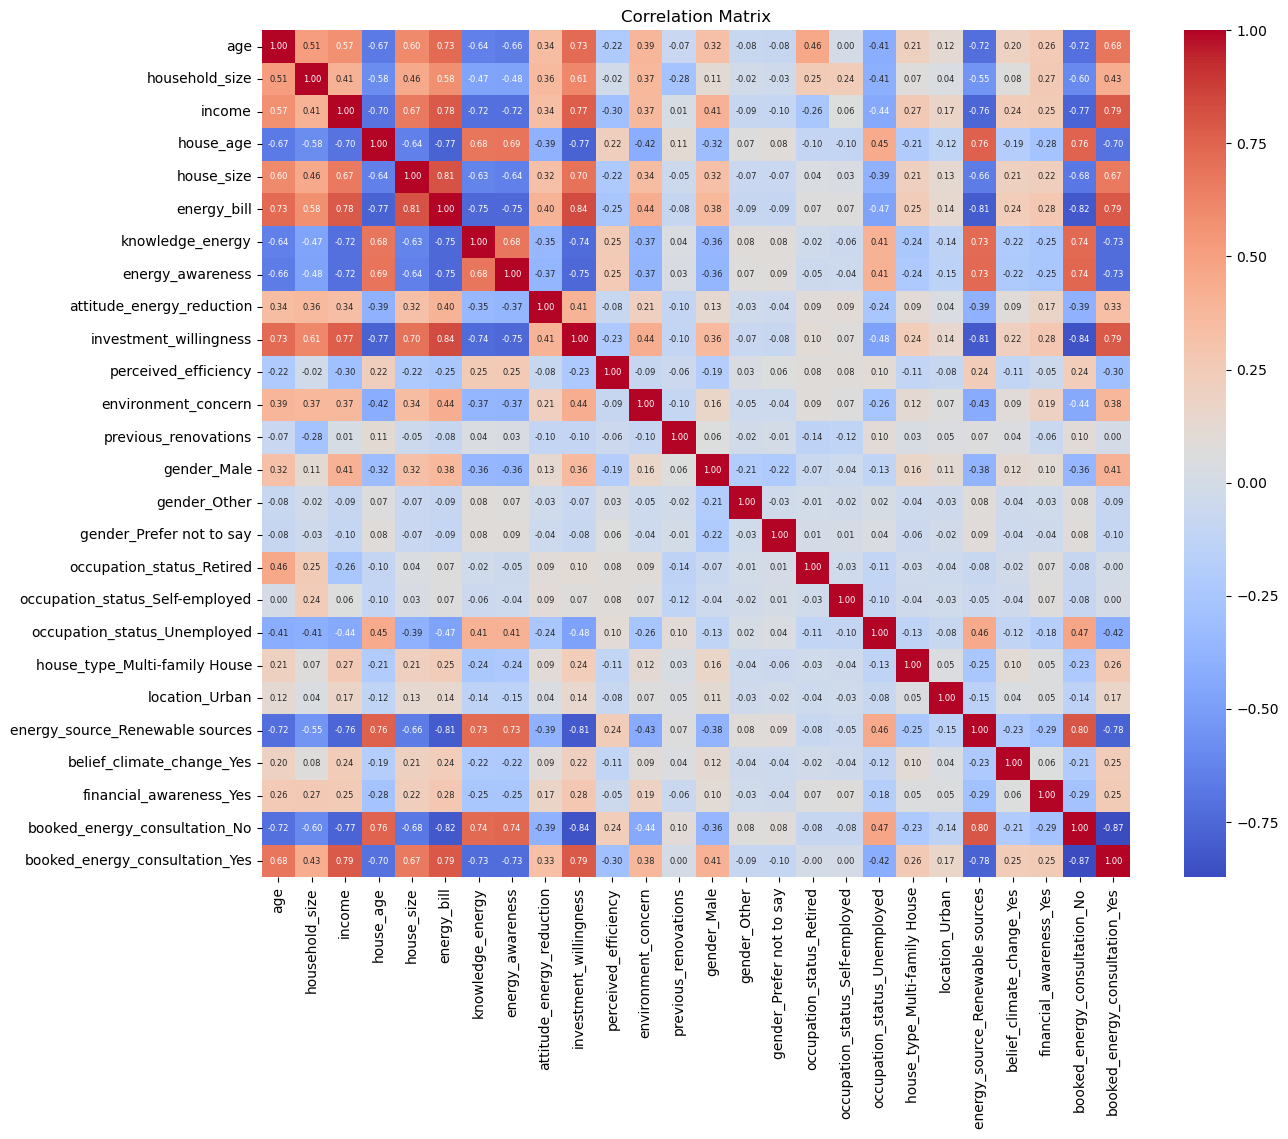

In [16]:
correlation_matrix = data_preprocessed.corr()

plt.figure(figsize=(14,11))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={'size': 6})
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()

After reviewing the correlation matrix, some features show moderately strong correlations. However, none exceed the defined threshold of 0.9, so all features are retained in the dataset.

### Scaling Numerical Features with MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
data_preprocessed[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
data_preprocessed.head()

In [ ]:
# This dataset is not used in the following Jupyter notebooks. 
# In each model file, the 'combined_data_binary.xlsx' file is used instead, and appropriately encoded and scaled depending on the specific requirements.
data_preprocessed.to_excel('data_preprocessed.xlsx')